# 4.10 Coding Etiquette and Excel Reporting

## This script contains:

### 01. Import Libraries
### 02. Import Data
### 03. Check Data
### 04. Addressing any PII data
### 05. Regional Segmentation
### 06. Exclude low-activity customers from data
### 07. Create Age, Income, Department and Family Status Profiles
### 08. Aggregated Max, Mean, Min Variables on Customer-Porfile Level
### 09. Customer profiles by region
### 10. Customer profiles by department
### 11. Further Project Analysis - Order Habits vs Loyalty
### 12. Further Project Analysis - Order Habits vs Region
### 13. Further Project Analysis - Product Preference
### 14. Export Final Data

## 01. Import Libraries

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

## 02. Import Data

In [2]:
# Defining path
path = r'/Users/sanyamohsini/Desktop/CareerFoundry_Data Analytics/Achievement 4/04-2023 Instacart Basket Analysis'

In [3]:
# Checking path
path

'/Users/sanyamohsini/Desktop/CareerFoundry_Data Analytics/Achievement 4/04-2023 Instacart Basket Analysis'

In [4]:
# Importing df_combined.pkl
df_combined = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'customer_merged.pkl'))

## 03. Check Data

In [5]:
# Check data
df_combined.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,product_name,...,frequency_flag,first_name,last_name,gender,state,age,date_joined,num_of_dependants,fam_status,income
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Regular Customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Regular Customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Regular Customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Regular Customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Regular Customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


In [6]:
# Check dimensions of data
df_combined.shape

(32404859, 33)

In [7]:
# Check all columns and data type
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32404859 entries, 0 to 32404858
Data columns (total 33 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   order_id                int64   
 1   user_id                 int64   
 2   order_number            int64   
 3   orders_day_of_week      int64   
 4   order_hour_of_day       int64   
 5   days_since_last_order   float64 
 6   product_id              int64   
 7   add_to_cart_order       int64   
 8   reordered               int64   
 9   product_name            object  
 10  aisle_id                int64   
 11  department_id           int64   
 12  prices                  float64 
 13  _merge                  category
 14  price_range_loc         object  
 15  busiest_day             object  
 16  busiest_days            object  
 17  busiest_period_of_day   object  
 18  max_order               int64   
 19  loyalty_flag            object  
 20  mean_price              float64 
 21  spendi

## 04. Addressing any Personally Identificable Information data

####  First_Name and Last_Name are considered PII because these columns could be tracked back to a particular person. These columns should be removed from the data set. 

In [8]:
# Drop PII columns
df_combined = df_combined.drop(columns = ['first_name','last_name'])

In [9]:
# Check that the PII columns were successfully dropped
df_combined.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_last_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', '_merge', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'mean_price', 'spending_flag', 'median_days_last_order',
       'frequency_flag', 'gender', 'state', 'age', 'date_joined',
       'num_of_dependants', 'fam_status', 'income'],
      dtype='object')

In [10]:
# Recheck dimensions of dataframe
df_combined.shape

(32404859, 31)

## 05. Regional Segmentation

In [11]:
# Create a regional segmentation of the data. Create a “Region” column based on the “State” column from customers data set.
# Create an empty list to create a region column
region = []

In [12]:
# Check to see how states are written in dataframe

df_combined['state'].value_counts(dropna = False)

Pennsylvania            667082
California              659783
Rhode Island            656913
Georgia                 656389
New Mexico              654494
Arizona                 653964
North Carolina          651900
Oklahoma                651739
Alaska                  648495
Minnesota               647825
Massachusetts           646358
Wyoming                 644255
Virginia                641421
Missouri                640732
Texas                   640394
Colorado                639280
Maine                   638583
North Dakota            638491
Alabama                 638003
Kansas                  637538
Louisiana               637482
Delaware                637024
South Carolina          636754
Oregon                  636425
Arkansas                636144
Nevada                  636139
New York                635983
Montana                 635265
South Dakota            633772
Illinois                633024
Hawaii                  632901
Washington              632852
Mississi

In [13]:
# Fill region column by grouping together states into regions

for value in df_combined['state']:
    if value in ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']: 
        region.append('Northeast')
    elif value in ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']:
        region.append('Midwest')
    elif value in ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']:
        region.append('South')
    elif value in ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']:
        region.append('West')

In [14]:
# Print the region list

region

['South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 '

In [15]:
# Combine new region column with df_combined
df_combined['region'] = region

In [16]:
# Check the frequency distribution
df_combined['region'].value_counts(dropna = False)

South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: region, dtype: int64

In [17]:
# Determine whether there’s a difference in spending habits between the different U.S. regions.
# Create a crosstab between region and spending_flag

crosstab_region_spending = pd.crosstab(df_combined['region'], df_combined['spending_flag'])

In [18]:
# Check output of crosstab
crosstab_region_spending

spending_flag,High Spender,Low Spender
region,,
Midwest,155975,7441350
Northeast,108225,5614511
South,209691,10582194
West,160354,8132559


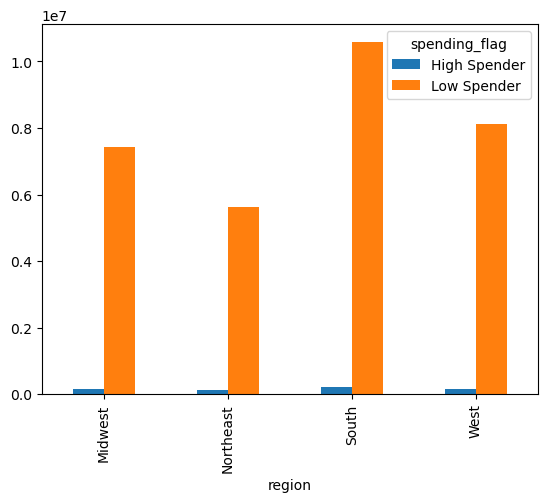

In [19]:
# Create a bar chart
region_spending_bar = crosstab_region_spending.plot.bar()

In [20]:
# Export region_spending_bar chart
region_spending_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_region_spending.png'))

## 06. Exclude low-activity customers from data

In [21]:
# Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data.
df_combined.loc[df_combined['max_order'] < 5, 'low_order_flag'] = 'Low-activity customer'

In [22]:
df_combined.loc[df_combined['max_order'] >= 5, 'low_order_flag'] = 'High-activity customer'

In [23]:
# Check output
df_combined.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,product_name,...,frequency_flag,gender,state,age,date_joined,num_of_dependants,fam_status,income,region,low_order_flag
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Regular Customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High-activity customer
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Regular Customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High-activity customer
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Regular Customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High-activity customer
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Regular Customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High-activity customer
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Regular Customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High-activity customer


In [24]:
# Check the frequency distribution
df_combined['low_order_flag'].value_counts(dropna = False)

High-activity customer    30964564
Low-activity customer      1440295
Name: low_order_flag, dtype: int64

In [25]:
# Create a sample with only high-activity customers
df_activity_customers = df_combined[df_combined['low_order_flag'] == 'High-activity customer']

In [26]:
df_activity_customers.shape

(30964564, 33)

In [28]:
# Export high-activity customer sample
df_activity_customers.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'all_combined_high_activity_customers_final.pkl'))

## 07. Create Age, Income, Department and Family Status Profiles

### Age Profile

In [29]:
# Create an age profile 
df_combined.loc[df_combined['age'] <= 35, 'age_profile'] = 'Young'

In [30]:
df_combined.loc[((df_combined['age'] > 35) & (df_combined['age'] < 65)), 'age_profile'] = 'Middle-aged'

In [31]:
df_combined.loc[df_combined['age'] >= 65, 'age_profile'] = 'Senior'

In [32]:
# Check value counts for age_profile
df_combined['age_profile'].value_counts(dropna = False)

Middle-aged    14683356
Young           9146419
Senior          8575084
Name: age_profile, dtype: int64

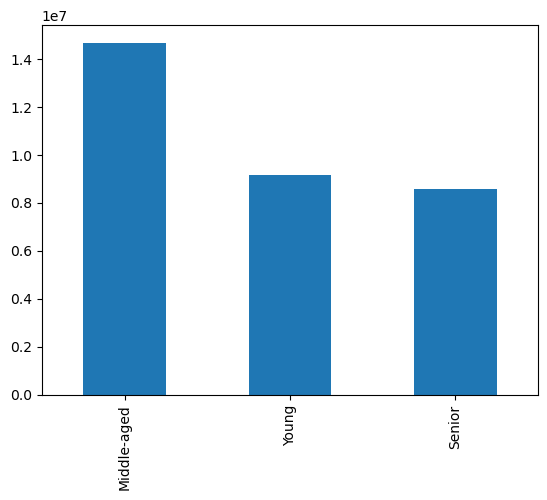

In [33]:
# Create a bar chart to visualize age profile
age_profile_bar = df_combined['age_profile'].value_counts().plot.bar()

In [34]:
# Export bar_age_profile chart
age_profile_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_age_profile.png'))


### Income Profile

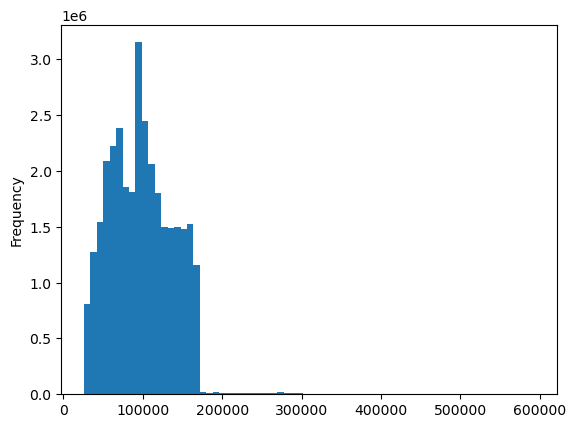

In [35]:
# Look at income distribution
hist_income = df_combined['income'].plot.hist(bins= 70)

In [36]:
# Export hist_income chart
hist_income.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_income.png'))

In [37]:
# Create income profile
df_combined.loc[df_combined['income'] < 75000, 'income_profile'] = 'Low income'

In [38]:
df_combined.loc[(df_combined['income'] >= 75000) & (df_combined['income'] < 125000), 'income_profile'] = 'Mid income'

In [39]:
df_combined.loc[df_combined['income'] >= 125000, 'income_profile'] = 'High income'

In [40]:
# Check value counts
df_combined['income_profile'].value_counts(dropna = False)

Mid income     13331136
Low income     10442766
High income     8630957
Name: income_profile, dtype: int64

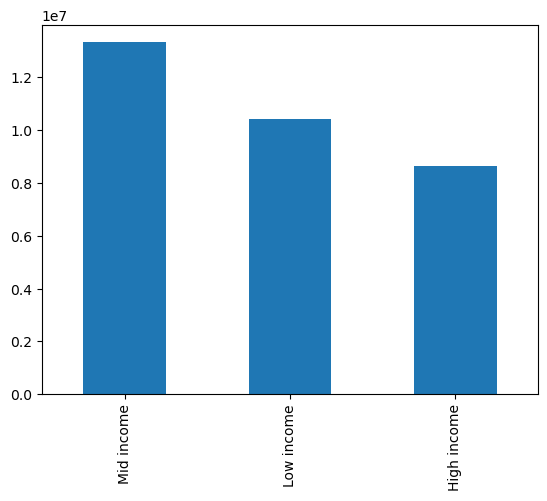

In [41]:
# Create a bar chart to visualize age profile
income_profile_bar = df_combined['income_profile'].value_counts().plot.bar()

In [42]:
# Export income_profile_bar chart
income_profile_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_income_profile.png'))

### Department Profile

In [43]:
#I will use department_id column to determine consumer diet preference (vegan vs non-vegan)
# Vegan diet excludes meat and dairy products (all departments except 12 and 16)

# Create crosstab between department_id and user_id
dept_user_crosstab = pd.crosstab(df_combined['department_id'], df_combined['user_id'], dropna = False)

In [44]:
# Assign diet flags and store them in python dictionary

vegan_dict = dict()
for user in dept_user_crosstab:
    workinglist = dept_user_crosstab[user].tolist()
    if workinglist[11] == 0 and workinglist[15] == 0:    #the index starts at 0, so index 0 corresponds to dept_id =1
        vegan_dict[user] = 'Vegan'
    else:
        vegan_dict[user] = 'Non-Vegan'

In [45]:
# Assign user flags to vegan flag
vegan_flag = []
for user in df_combined['user_id']:
    vegan_flag.append(vegan_dict[user])
    

In [46]:
# Add the flag values to the dataframe
df_combined['Vegan_profile'] = vegan_flag

In [47]:
# Check value counts for vegan profile
df_combined['Vegan_profile'].value_counts(dropna = False)

Non-Vegan    32021432
Vegan          383427
Name: Vegan_profile, dtype: int64

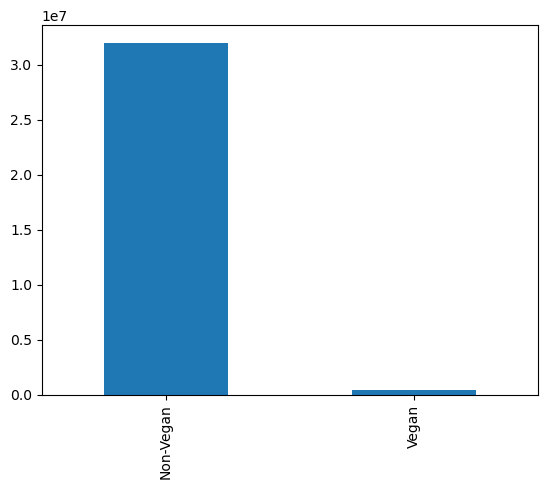

In [48]:
# Create bar chart to visualize vegan profile
bar_vegan_profile = df_combined['Vegan_profile'].value_counts().plot.bar()

In [49]:
# Export vegan_profile_bar chart
bar_vegan_profile.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_vegan_profile.png'))

In [50]:
# Pet owners vs non-pet owners
# I will use department_id column (department_id = 8) to seperate the customers into pet owners and non-pet owners

#Assign pet flags to users and story it in python dictionary
pet_dict = dict()
for user in dept_user_crosstab:
    workinglist = dept_user_crosstab[user].tolist()
    if workinglist[7] == 0:   # the infex starts at 0, so the index corresponds to dept_id =1
        pet_dict[user] = 'Non-pet owner'
    else: 
        pet_dict[user] = 'Pet owner'

In [51]:
# Assign user flags to the pet flag
pet_flag = []
for user in df_combined['user_id']:
    pet_flag.append(pet_dict[user])

In [52]:
# Add pet flag column to dataframe as pet profile
df_combined['pet_profile'] = pet_flag

In [53]:
# Check value counts for pet profile
df_combined['pet_profile'].value_counts(dropna = False)

Non-pet owner    28876718
Pet owner         3528141
Name: pet_profile, dtype: int64

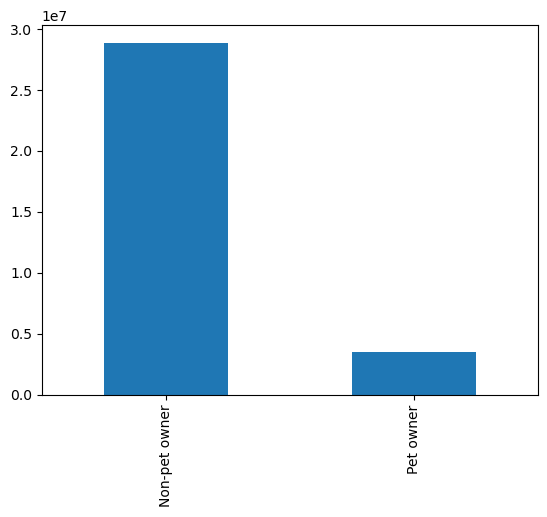

In [54]:
# Create a bar chart to visualize pet profile
pet_profile_bar = df_combined['pet_profile'].value_counts().plot.bar()

In [55]:
# Export pet_profile_bar chart
pet_profile_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_pet_profile.png'))

### Number of Dependents / Family Status

In [56]:
# Check frequency distribution for family status
df_combined['fam_status'].value_counts(dropna = False)

married                             22756753
single                               5325691
divorced/widowed                     2771812
living with parents and siblings     1550603
Name: fam_status, dtype: int64

In [57]:
# Create crosstab between number of dependants and family status
family_crosstab = pd.crosstab(df_combined['fam_status'], df_combined['num_of_dependants'], dropna = False)

In [58]:
# Check family crosstab
family_crosstab

num_of_dependants,0,1,2,3
fam_status,,,,
divorced/widowed,2771812,0,0,0
living with parents and siblings,0,530200,507963,512440
married,0,7550904,7583180,7622669
single,5325691,0,0,0


#### From the family_crosstab we can see that people who are divorced/widowed or single have no dependants. 

I will combine information in the following way:

Family_status = marrried and num_of_dependants =1: Married, no children/dependants
Family_status = marrried and num_of_dependants >=2: Married, with children/dependants
Family_status = single, divorced/widows, living with parents and sibilings and num_of_dependants == 0, single, no children/dependants
Family_status = single, divorced/widows, living with parents and sibilings and num_of_dependants >=1, single, with children/dependants

In [59]:
# Create family status profile
df_combined.loc[(df_combined['fam_status'] == 'married') & (df_combined['num_of_dependants'] == 1), 'family_profile'] = 'Married, no children/dependants'

In [60]:
df_combined.loc[(df_combined['fam_status'] == 'married') & (df_combined['num_of_dependants'] >= 2), 'family_profile'] = 'Married, with children/dependants'

In [61]:
df_combined.loc[(df_combined['fam_status'] != 'married') & (df_combined['num_of_dependants'] == 0), 'family_profile'] = 'Single, no children/dependants'

In [62]:
df_combined.loc[(df_combined['fam_status'] != 'married') & (df_combined['num_of_dependants'] >= 1), 'family_profile'] = 'Single, with children/dependants'

In [63]:
# Check frequency distribution for family_profile
df_combined['family_profile'].value_counts(dropna = False)

Married, with children/dependants    15205849
Single, no children/dependants        8097503
Married, no children/dependants       7550904
Single, with children/dependants      1550603
Name: family_profile, dtype: int64

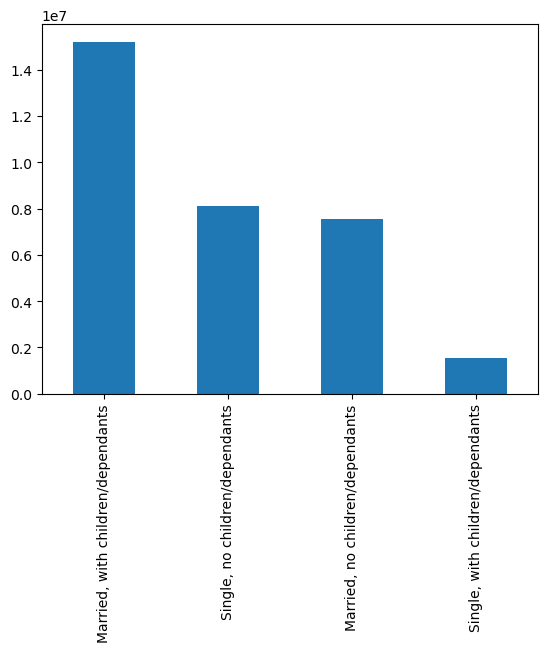

In [64]:
# Create a bar chart to visualize family profile
family_profile_bar = df_combined['family_profile'].value_counts().plot.bar()

In [65]:
# Export pet_profile_bar chart
family_profile_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_family_profile.png'))

## 08. Aggregate max, mean and min variables on customer-profile level

In [66]:
# age profile status
df_combined.groupby('age_profile').agg({'days_since_last_order': ['min', 'mean', 'max'], 'prices': ['min', 'mean', 'max']})

days_since_last_order                  prices                    
                              min       mean   max    min       mean      max
age_profile                                                                  
Middle-aged                   0.0  11.105992  30.0    1.0  12.013373  99999.0
Senior                        0.0  11.078641  30.0    1.0  11.768850  99999.0
Young                         0.0  11.124858  30.0    1.0  12.125184  99999.0

In [67]:
# income profile status
df_combined.groupby('income_profile').agg({'days_since_last_order': ['min', 'mean', 'max'], 'prices': ['min', 'mean', 'max']})

days_since_last_order                  prices             \
                                 min       mean   max    min       mean   
income_profile                                                            
High income                      0.0  11.024072  30.0    1.0  21.348529   
Low income                       0.0  11.240514  30.0    1.0   7.443285   
Mid income                       0.0  11.049451  30.0    1.0   9.468870   

                         
                    max  
income_profile           
High income     99999.0  
Low income      14900.0  
Mid income      99999.0

In [68]:
# department vegan diet profile status
df_combined.groupby('Vegan_profile').agg({'days_since_last_order': ['min', 'mean', 'max'], 'prices': ['min', 'mean', 'max']})

days_since_last_order                  prices                   
                                min       mean   max    min      mean      max
Vegan_profile                                                                 
Non-Vegan                       0.0  11.063329  30.0    1.0  12.03974  99999.0
Vegan                           0.0  14.749275  30.0    1.0   7.00992     20.0

In [69]:
# department pet owner profile status
df_combined.groupby('pet_profile').agg({'days_since_last_order': ['min', 'mean', 'max'], 'prices': ['min', 'mean', 'max']})

days_since_last_order                  prices             \
                                min       mean   max    min       mean   
pet_profile                                                              
Non-pet owner                   0.0  11.200417  30.0    1.0  11.680857   
Pet owner                       0.0  10.327303  30.0    1.0  14.430461   

                        
                   max  
pet_profile             
Non-pet owner  99999.0  
Pet owner      99999.0

In [70]:
# family status profile status
df_combined.groupby('family_profile').agg({'days_since_last_order': ['min', 'mean', 'max'], 'prices': ['min', 'mean', 'max']})

days_since_last_order                   \
                                                    min       mean   max   
family_profile                                                             
Married, no children/dependants                     0.0  11.113141  30.0   
Married, with children/dependants                   0.0  11.117681  30.0   
Single, no children/dependants                      0.0  11.080805  30.0   
Single, with children/dependants                    0.0  11.048170  30.0   

                                  prices                      
                                     min       mean      max  
family_profile                                                
Married, no children/dependants      1.0  11.705834  99999.0  
Married, with children/dependants    1.0  12.154546  99999.0  
Single, no children/dependants       1.0  12.129243  99999.0  
Single, with children/dependants     1.0  10.828768  99999.0

## 09. Customer profiles by regions

In [72]:
# Age
# Create a crosstab to compare age profile and region
age_region_crosstab = pd.crosstab(df_combined['age_profile'], df_combined['region'], dropna = False, normalize = 'columns')

In [73]:
age_region_crosstab

region,Midwest,Northeast,South,West
age_profile,,,,
Middle-aged,0.459602,0.444810,0.451132,0.455511
Senior,0.262045,0.271531,0.262814,0.264573
Young,0.278353,0.283659,0.286054,0.279916


#### The age groups are similarly big across the different regions.

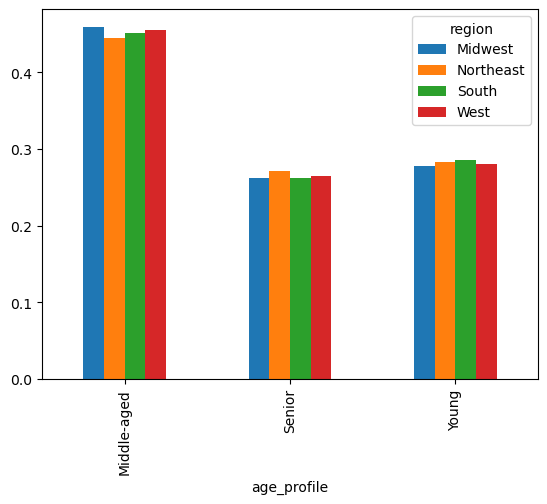

In [75]:
# create a bar chart to visualize the relationship between age profile and region
bar_age_region = age_region_crosstab.plot.bar()

In [76]:
# Export age_profile and region bar chart
bar_age_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_age_profile_region.png'))

In [77]:
# income
# Create a crosstab to compare age profile and region
income_region_crosstab = pd.crosstab(df_combined['income_profile'], df_combined['region'], dropna = False, normalize = 'columns')

In [78]:
income_region_crosstab

region,Midwest,Northeast,South,West
income_profile,,,,
High income,0.270318,0.268977,0.262824,0.265481
Low income,0.319571,0.318405,0.323667,0.325550
Mid income,0.410111,0.412618,0.413510,0.408968


#### The income groups are similar in size across different regions.

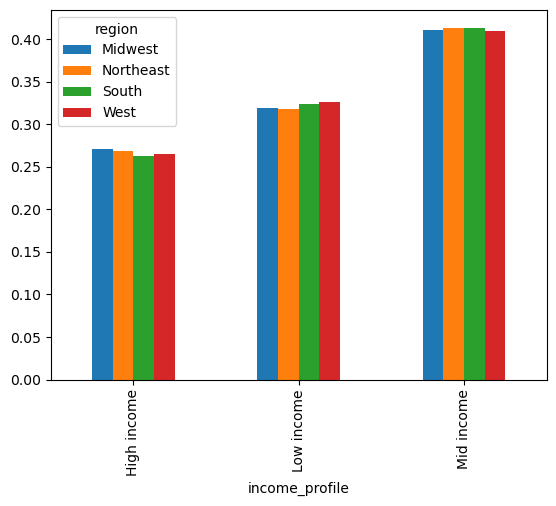

In [79]:
# create a bar chart to visualize the relationship between income profile and region
bar_income_region = income_region_crosstab.plot.bar()

In [84]:
# Export income_profile and region bar chart
bar_income_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_income_profile_region.png'))

In [81]:
# vegan diet
# Create a crosstab to compare diet profile and region
vegan_region_crosstab = pd.crosstab(df_combined['Vegan_profile'], df_combined['region'], dropna = False, normalize = 'columns')

In [82]:
vegan_region_crosstab

region,Midwest,Northeast,South,West
Vegan_profile,,,,
Non-Vegan,0.988115,0.988159,0.988389,0.987934
Vegan,0.011885,0.011841,0.011611,0.012066


#### Diet preferences (vegan vs non-vegan) are similar across the different regions

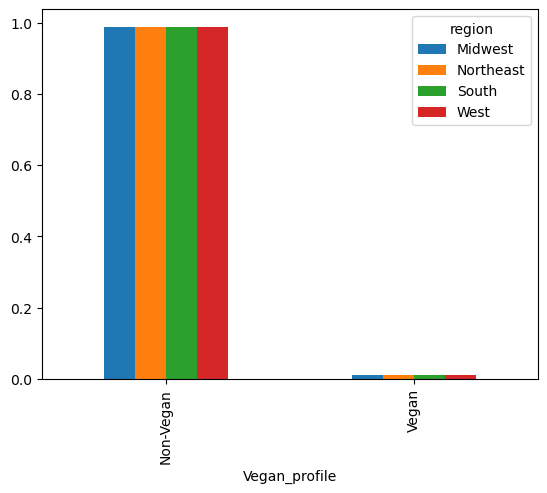

In [83]:
# create a bar chart to visualize the relationship between diet profile and region
bar_diet_region = vegan_region_crosstab.plot.bar()

In [85]:
# Export vegan_profile and region bar chart
bar_diet_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_diet_profile_region.png'))

In [86]:
# pet ownership
# Create a crosstab to compare pet ownership profile and region
pet_region_crosstab = pd.crosstab(df_combined['pet_profile'], df_combined['region'], dropna = False, normalize = 'columns')

In [87]:
pet_region_crosstab

region,Midwest,Northeast,South,West
pet_profile,,,,
Non-pet owner,0.888836,0.892981,0.894204,0.887927
Pet owner,0.111164,0.107019,0.105796,0.112073


#### Pet ownership is similar across the different regions.

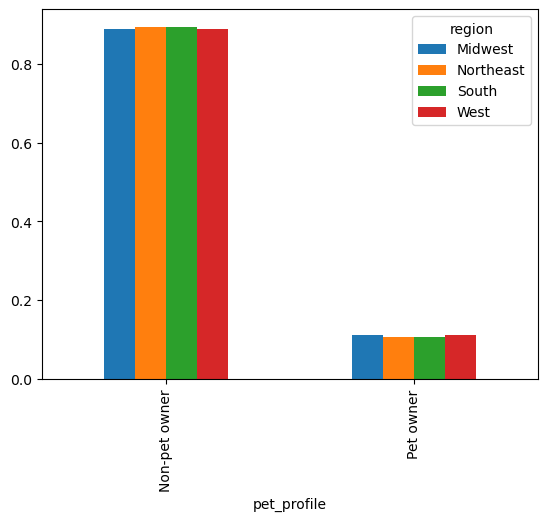

In [88]:
# create a bar chart to visualize the relationship between pet profile and region
bar_pet_region = pet_region_crosstab.plot.bar()

In [89]:
# Export pet_profile and region bar chart
bar_pet_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_pet_profile_region.png'))

In [90]:
# family status
# Create a crosstab to compare family profile and region
family_region_crosstab = pd.crosstab(df_combined['family_profile'], df_combined['region'], dropna = False, normalize = 'columns')

In [91]:
family_region_crosstab

region,Midwest,Northeast,South,West
family_profile,,,,
"Married, no children/dependants",0.236932,0.236116,0.229883,0.231373
"Married, with children/dependants",0.464053,0.469197,0.470703,0.472141
"Single, no children/dependants",0.250772,0.247836,0.250342,0.249893
"Single, with children/dependants",0.048243,0.046851,0.049072,0.046593


#### Family status is pretty similar among the different regions.

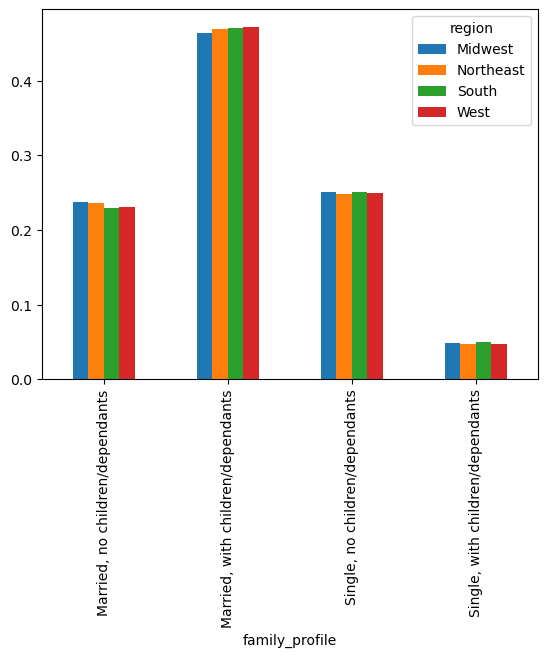

In [92]:
# create a bar chart to visualize the relationship between family profile and region
bar_family_region = family_region_crosstab.plot.bar()

In [93]:
# Export family_profile and region bar chart
bar_family_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_family_profile_region.png'))

## 10. Customer profiles by department

In [94]:
# Age
# Create a crosstab to compare age_profile and department_id, look at percentage for better comparability
age_department_crosstab = pd.crosstab(df_combined['age_profile'], df_combined['department_id'], dropna = False, normalize ='index')

In [95]:
# Show all columns for age_department_crosstab
pd.set_option('display.max_columns', None)

In [96]:
age_department_crosstab

department_id,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
age_profile,,,,,,,,,,,,,,,,,,,,,
Middle-aged,0.068932,0.001121,0.036165,0.292636,0.004749,0.008296,0.083295,0.002976,0.026720,0.001049,0.013965,0.021776,0.057839,0.021697,0.032856,0.166074,0.022806,0.013413,0.089074,0.032448,0.002113
Senior,0.069232,0.001099,0.036096,0.293147,0.004552,0.008253,0.083362,0.003065,0.026698,0.001078,0.013691,0.022171,0.057956,0.021439,0.032937,0.166321,0.022966,0.012763,0.088689,0.032375,0.002110
Young,0.068762,0.001138,0.036285,0.291769,0.004912,0.008381,0.082025,0.003031,0.026825,0.001085,0.013680,0.021765,0.057850,0.021933,0.033147,0.167717,0.022617,0.012836,0.089558,0.032492,0.002190


#### Different age groups buy different products (departments) at similar rates.

In [99]:
# Create a new crosstab so that the departments are on the x-axis
age_department_crosstab = pd.crosstab(df_combined['department_id'], df_combined['age_profile'])

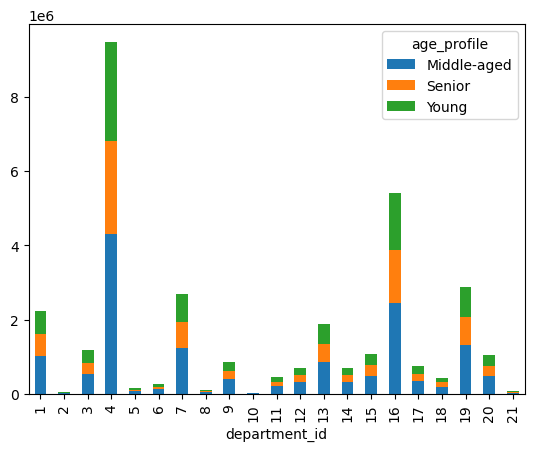

In [102]:
# Create stacked bar plot to visualize the relationship between age profile and department
bar_age_department = age_department_crosstab.plot.bar(stacked = True)

In [103]:
# Export age_profile and department bar chart
bar_age_department.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_age_profile_department.png'))

In [104]:
# Income
# Create a crosstab to compare income_profile and department_id, look at percentage for better comparability
income_department_crosstab = pd.crosstab(df_combined['income_profile'], df_combined['department_id'], dropna = False, normalize ='index')

In [105]:
# Show all columns for income_department_crosstab
pd.set_option('display.max_columns', None)

In [106]:
income_department_crosstab

department_id,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
income_profile,,,,,,,,,,,,,,,,,,,,,
High income,0.070178,0.001124,0.037367,0.296090,0.005225,0.008508,0.079665,0.003198,0.027690,0.000964,0.013796,0.023733,0.059357,0.021042,0.034518,0.169215,0.022926,0.013578,0.077290,0.032395,0.002141
Low income,0.067229,0.001114,0.034505,0.279570,0.004614,0.007760,0.091741,0.002845,0.024468,0.001184,0.013988,0.017992,0.055207,0.023537,0.030146,0.160883,0.023559,0.011447,0.113855,0.032205,0.002150
Mid income,0.069535,0.001122,0.036725,0.300369,0.004532,0.008610,0.078201,0.003031,0.027914,0.001042,0.013684,0.023719,0.059001,0.020675,0.034155,0.169392,0.022112,0.014033,0.077375,0.032656,0.002116


#### department_id
1 frozen, 2	other, 3 bakery, 4 produce, 5 alcohol, 6 international, 7 beverages, 8 pets, 9 dry goods pasta, 10	bulk, 11 personal care, 12 meat seafood, 13	pantry, 14 breakfast, 15 canned goods, 16 dairy eggs, 17 household, 18 babies, 19 snacks, 20 deli, 21 missing

There are slight differences between income levels and departments. For instance, low income spends slightly more on beverages, snacks, household and bulk. High income tends to spend more overall than low income.

In [110]:
# Create a new crosstab so that the departments are on the x-axis
income_department_crosstab = pd.crosstab(df_combined['department_id'], df_combined['income_profile'])

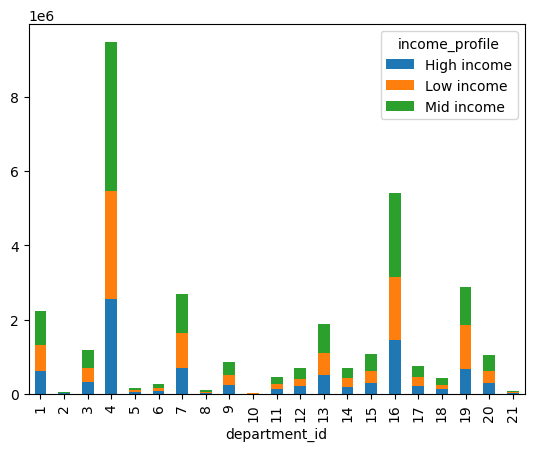

In [111]:
# Create stacked bar plot to visualize the relationship between income profile and department
bar_income_department = income_department_crosstab.plot.bar(stacked = True)

In [112]:
# Export income_profile and department bar chart
bar_income_department.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_income_profile_department.png'))

In [113]:
# Diet
# Create a crosstab to compare Vegan_profile and department_id, look at percentage for better comparability
vegan_department_crosstab = pd.crosstab(df_combined['Vegan_profile'], df_combined['department_id'], dropna = False, normalize ='index')

In [114]:
# Show all columns for vegan_department_crosstab
pd.set_option('display.max_columns', None)

In [115]:
vegan_department_crosstab

department_id,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
Vegan_profile,,,,,,,,,,,,,,,,,,,,,
Non-Vegan,0.069073,0.001104,0.036399,0.292392,0.004387,0.008358,0.081628,0.003010,0.026952,0.001059,0.013644,0.022139,0.058016,0.021700,0.033148,0.168598,0.022303,0.013163,0.088189,0.032604,0.002135
Vegan,0.059795,0.002470,0.017964,0.303800,0.034432,0.004222,0.193680,0.003484,0.009386,0.001750,0.027872,0.000000,0.045936,0.021263,0.017244,0.000000,0.063884,0.006045,0.165925,0.018809,0.002037


#### 1 frozen, 2 other, 3 bakery, 4 produce, 5 alcohol, 6 international, 7 beverages, 8 pets, 9 dry goods pasta, 10 bulk, 11 personal care, 12 meat seafood, 13 pantry, 14 breakfast, 15 canned goods, 16 dairy eggs, 17 household, 18 babies, 19 snacks, 20 deli, 21 missing

Non-Vegans spend more on frozen, bakery, dry goods, meat/seafood, pantry, canned goods, dairy/eggs and deli. Vegans dont buy meat/seafood or dairy/eggs and spend more on produce, alcohol, beverages, personal care, houshold and snacks. 

In [116]:
# Create a new crosstab so that the departments are on the x-axis
vegan_department_crosstab = pd.crosstab(df_combined['department_id'], df_combined['Vegan_profile'])

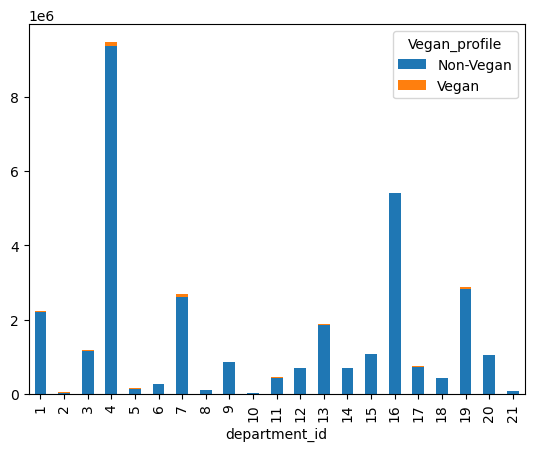

In [117]:
# Create stacked bar plot to visualize the relationship between vegan profile and department
bar_vegan_department = vegan_department_crosstab.plot.bar(stacked = True)

In [118]:
# Export vegan_profile and department bar chart
bar_vegan_department.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_vegan_profile_department.png'))

In [119]:
# Pet ownership
# Create a crosstab to compare pet_profile and department_id, look at percentage for better comparability
pet_department_crosstab = pd.crosstab(df_combined['pet_profile'], df_combined['department_id'], dropna = False, normalize ='index')

In [120]:
# Show all columns for pet_department_crosstab
pd.set_option('display.max_columns', None)

In [121]:
pet_department_crosstab

department_id,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
pet_profile,,,,,,,,,,,,,,,,,,,,,
Non-pet owner,0.067467,0.001073,0.035727,0.301132,0.004379,0.008229,0.081797,0.000000,0.026454,0.001123,0.012809,0.021731,0.057295,0.021716,0.032514,0.168440,0.020810,0.013420,0.089221,0.032534,0.002131
Pet owner,0.081209,0.001508,0.039890,0.222100,0.007724,0.008966,0.092426,0.027696,0.029118,0.000606,0.022023,0.023070,0.062607,0.021523,0.036612,0.151564,0.039044,0.010282,0.088190,0.031683,0.002160


#### 1 frozen, 2 other, 3 bakery, 4 produce, 5 alcohol, 6 international, 7 beverages, 8 pets, 9 dry goods pasta, 10 bulk, 11 personal care, 12 meat seafood, 13 pantry, 14 breakfast, 15 canned goods, 16 dairy eggs, 17 household, 18 babies, 19 snacks, 20 deli, 21 missing

Non-Pet owners spend more on produce, dairy/eggs, babies and snacks, whether as pet owners spend more on frozen, alcohol, beverages, pets, dry goods, persona care, pantry and household. 

In [122]:
# Create a new crosstab so that the departments are on the x-axis
pet_department_crosstab = pd.crosstab(df_combined['department_id'], df_combined['pet_profile'])

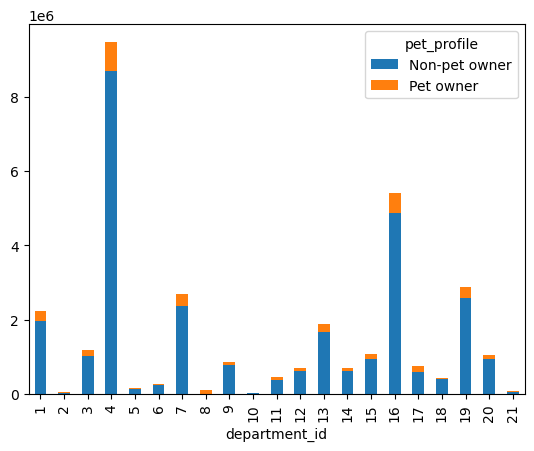

In [123]:
# Create stacked bar plot to visualize the relationship between pet profile and department
bar_pet_department = pet_department_crosstab.plot.bar(stacked = True)

In [124]:
# Export pet_profile and department bar chart
bar_pet_department.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_pet_profile_department.png'))

In [125]:
# Family status
# Create a crosstab to compare family_profile and department_id, look at percentage for better comparability
family_department_crosstab = pd.crosstab(df_combined['family_profile'], df_combined['department_id'], dropna = False, normalize ='index')

In [126]:
# Show all columns for family_department_crosstab
pd.set_option('display.max_columns', None)

In [127]:
family_department_crosstab

department_id,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
family_profile,,,,,,,,,,,,,,,,,,,,,
"Married, no children/dependants",0.068501,0.001134,0.036290,0.292094,0.004674,0.008405,0.082844,0.002980,0.026714,0.001107,0.013833,0.022041,0.058145,0.021909,0.033025,0.167336,0.022995,0.012703,0.089014,0.032144,0.002111
"Married, with children/dependants",0.069171,0.001094,0.036029,0.292561,0.004629,0.008221,0.083094,0.002960,0.026828,0.001070,0.013798,0.021994,0.057826,0.021590,0.033057,0.166058,0.022954,0.013235,0.089272,0.032420,0.002140
"Single, no children/dependants",0.068806,0.001133,0.036358,0.293355,0.004831,0.008362,0.083290,0.003036,0.026584,0.001022,0.013832,0.021498,0.057642,0.021559,0.032706,0.166639,0.022325,0.013151,0.089015,0.032744,0.002110
"Single, with children/dependants",0.069994,0.001232,0.036207,0.289970,0.005737,0.008432,0.080375,0.003624,0.026894,0.001080,0.013744,0.021915,0.058217,0.022398,0.033013,0.168184,0.022718,0.012992,0.088458,0.032513,0.002303


#### 1 frozen, 2 other, 3 bakery, 4 produce, 5 alcohol, 6 international, 7 beverages, 8 pets, 9 dry goods pasta, 10 bulk, 11 personal care, 12 meat seafood, 13 pantry, 14 breakfast, 15 canned goods, 16 dairy eggs, 17 household, 18 babies, 19 snacks, 20 deli, 21 missing

Single, with children/dependants spend more on alcohol and canned goods.
Single, with children and single with no children spend more on pets.
Married with no children spend more on bulk.


In [128]:
# Create a new crosstab so that the departments are on the x-axis
family_department_crosstab = pd.crosstab(df_combined['department_id'], df_combined['family_profile'])

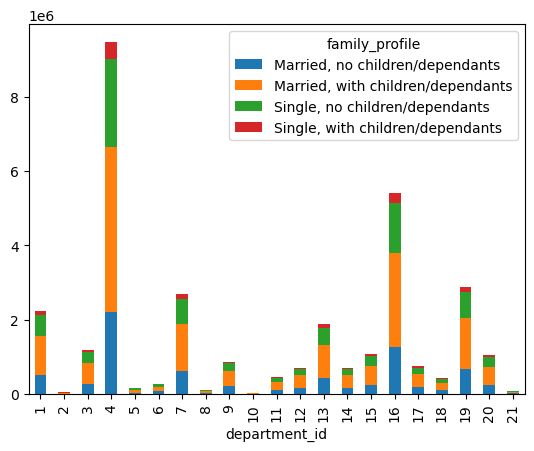

In [129]:
# Create stacked bar plot to visualize the relationship between family profile and department
bar_family_department = family_department_crosstab.plot.bar(stacked = True)

In [130]:
# Export pet_profile and department bar chart
bar_family_department.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_family_profile_department.png'))

## 11. Further Project Analsyis - Ordering Habits vs Loyalty

In [131]:
# Create a crosstab comparing loyalty_flag and deartment_id, looking at percentages for better comparability
loyalty_department_crosstab = pd.crosstab(df_combined['department_id'], df_combined['loyalty_flag'], dropna = False, normalize ='index')

In [132]:
loyalty_department_crosstab

loyalty_flag,Loyal customer,New customer,Regular customer
department_id,,,
1,0.272720,0.217154,0.510126
2,0.295252,0.212697,0.492050
3,0.324005,0.190804,0.485191
4,0.332027,0.183202,0.484772
5,0.251945,0.245276,0.502778
6,0.291154,0.212079,0.496767
7,0.318072,0.190791,0.491136
8,0.260643,0.210160,0.529197
9,0.279913,0.218464,0.501623


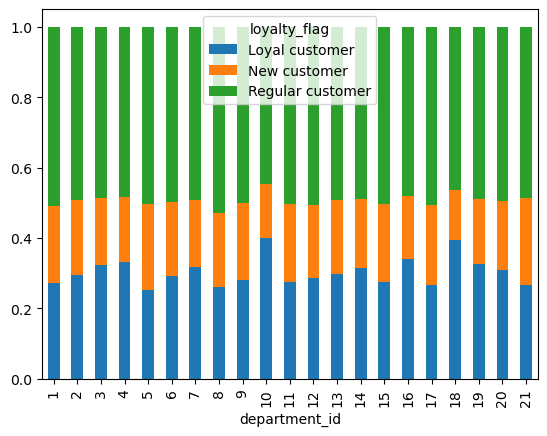

In [133]:
# Create a stacked bar chart of department_loyalty_department
bar_loyalty_department = loyalty_department_crosstab.plot.bar(stacked = True)

In [134]:
# Export loyalty flag and department bar chart
bar_loyalty_department.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_loyalty_profile_department.png'))

## 12. Further Project Analysis - Order Habits vs Region

In [135]:
# Create a crosstab comparing region and deartment_id, looking at percentages for better comparability
region_department_crosstab = pd.crosstab(df_combined['department_id'], df_combined['region'], normalize ='index')

In [136]:
region_department_crosstab

region,Midwest,Northeast,South,West
department_id,,,,
1,0.234522,0.174927,0.334669,0.255881
2,0.232013,0.181450,0.336502,0.250034
3,0.233591,0.177921,0.331632,0.256856
4,0.235032,0.175735,0.333416,0.255817
5,0.235439,0.172692,0.335884,0.255986
6,0.236714,0.174152,0.331072,0.258062
7,0.232718,0.179835,0.334412,0.253036
8,0.228775,0.190358,0.319999,0.260868
9,0.235129,0.175180,0.331681,0.258010


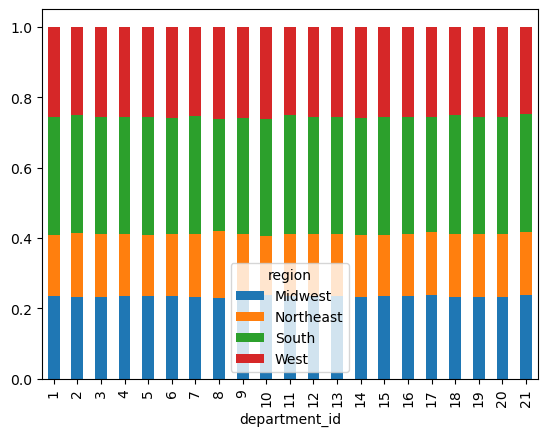

In [137]:
# Create a stacked bar chart of department_region_department
bar_region_department = region_department_crosstab.plot.bar(stacked = True)

In [143]:
# Export region and department bar chart
bar_region_department.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_region_profile_department.png'))

## 13. Further Project Analysis - Product Preference

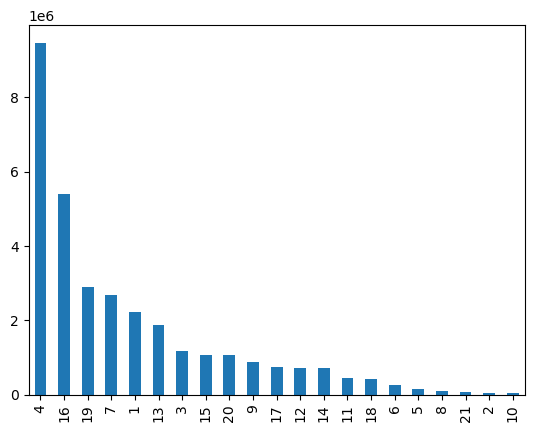

In [140]:
# Create a bar chart for department_id

bar_department_id= df_combined['department_id'].value_counts().plot.bar()

In [142]:
# Export region and department bar chart
bar_department_id.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_department_department.png'))

## 14. Tidy up and Export Final Data Set

In [144]:
# Export final data set
df_combined.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'final_instacart_analysis_data.pkl'))